In [93]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pyseir.models.seir_model import SEIRModel
from pyseir.inference.model_fitter import ModelFitter, run_state
from pyseir.ensembles.ensemble_runner import EnsembleRunner
from pyseir.inference.fit_results import load_inference_result
from epiweeks import Week, Year
from pyseir.utils import REF_DATE
import scipy
from datetime import datetime, timedelta
import inspect
from pyseir import load_data
from pyseir.cdc.output_mapper import OutputMapper, run_all
from epiweeks import Week, Year
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
np.concatenate([[0.01, 0.025], np.arange(0.05, 0.95, 0.05), [0.975, 0.99]])

array([0.01 , 0.025, 0.05 , 0.1  , 0.15 , 0.2  , 0.25 , 0.3  , 0.35 ,
       0.4  , 0.45 , 0.5  , 0.55 , 0.6  , 0.65 , 0.7  , 0.75 , 0.8  ,
       0.85 , 0.9  , 0.975, 0.99 ])

In [17]:
run_state(state='California', states_only=True)

/anaconda3/envs/pyseir/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


------------------------------------------------------------------
| FCN = 99.88                   |     Ncalls=312 (312 total)     |
| EDM = 0.00881 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------


In [92]:
run_all()

defaultdict(<class 'list'>, {'cum death':                                 0          1           2            3   \
2 day ahead cum death   157.718471  58.893769  136.213132  1044.089809   
3 day ahead cum death   162.201248  60.487789  139.894785  1074.418850   
4 day ahead cum death   166.706902  62.089116  143.592746  1104.865309   
5 day ahead cum death   171.235243  63.697810  147.306966  1135.426529   
6 day ahead cum death   175.786160  65.313937  151.037441  1166.099130   
7 day ahead cum death   180.359652  66.937704  154.784172  1196.880536   
8 day ahead cum death   184.955720  68.569291  158.547027  1227.768571   
9 day ahead cum death   189.574363  70.208588  162.326907  1258.761247   
10 day ahead cum death  194.215584  71.855488  166.123833  1289.856760   
11 day ahead cum death  198.879380  73.509993  169.937124  1321.053489   
12 day ahead cum death  203.566264  75.172101  173.766829  1352.349962   
13 day ahead cum death  208.276354  76.841814  177.613192  1383.744825

/anaconda3/envs/pyseir/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


defaultdict(<class 'list'>, {'cum death':                                  0            1             2             3   \
2 day ahead cum death   3042.284143  2691.147564  34278.860020  13883.139514   
3 day ahead cum death   3134.295389  2771.708976  34530.019552  14260.155442   
4 day ahead cum death   3226.861652  2852.613099  34768.410366  14635.705909   
5 day ahead cum death   3320.040506  2933.826568  34994.764648  15009.727420   
6 day ahead cum death   3413.831951  3015.332341  35209.781153  15381.983000   
7 day ahead cum death   3508.272759  3097.151635  35414.119018  15752.343743   
8 day ahead cum death   3603.359608  3179.251224  35608.371325  16120.717686   
9 day ahead cum death   3698.780478  3261.580993  35793.120920  16486.787720   
10 day ahead cum death  3794.803279  3344.113981  35968.875087  16850.414371   
11 day ahead cum death  3891.419882  3426.823225  36136.164804  17211.597640   
12 day ahead cum death  3988.621446  3509.682919  36295.465714  17570.337526  

In [52]:
from pyseir import OUTPUT_DIR

In [53]:
OUTPUT_DIR

PosixPath('/Users/xzhang/Documents/covid/covid-data-model/output')

In [4]:
from pyseir import load_data
df_whitelist = load_data.load_whitelist()
df_whitelist = df_whitelist[df_whitelist['inference_ok'] == True]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           1288 non-null   object 
 1   value            1288 non-null   float64
 2   quantile         1232 non-null   float64
 3   location         1288 non-null   int64  
 4   location_name    1288 non-null   object 
 5   target_end_date  1288 non-null   object 
 6   type             1288 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 70.6+ KB


In [78]:
df = pd.read_csv('~/Documents/covid/covid-data-model/output/pyseir/cdc/2020-05-07_CovidActNow_SEIR_CAN_06.csv',
                 dtype=str)

In [79]:
df

,target,value,quantile,location,location_name,target_end_date,type
0,2 day ahead cum death,0.0,0.010,06,California,2020-05-16,quantile
1,2 day ahead cum death,0.0,0.025,06,California,2020-05-16,quantile
2,2 day ahead cum death,56.329807115255896,0.050,06,California,2020-05-16,quantile
3,2 day ahead cum death,86.31496871113737,0.100,06,California,2020-05-16,quantile
4,2 day ahead cum death,155.45775175460446,0.150,06,California,2020-05-16,quantile
...,...,...,...,...,...,...,...
639,4 day ahead inc hosp,526.8847915398069,NaN,06,California,2020-05-16,point
640,5 day ahead inc hosp,529.4595558270645,NaN,06,California,2020-05-16,point
641,6 day ahead inc hosp,531.9700294142705,NaN,06,California,2020-05-16,point
642,7 day ahead inc hosp,534.4169637820046,NaN,06,California,2020-05-16,point


In [68]:
df['location'] = df['location'].apply(lambda s: ('0' + str(s))[-2:])

In [69]:
df['location'] = df['location'].apply(lambda s: s[1:-1])

In [71]:
df.to_csv('~/Documents/covid/covid-data-model/output/pyseir/cdc/2020-05-07_CovidActNow_SEIR_CAN.csv')

In [70]:
df['location']

0       '06'
1       '06'
2       '06'
3       '06'
4       '06'
        ... 
1283    '36'
1284    '36'
1285    '36'
1286    '36'
1287    '36'
Name: location, Length: 1288, dtype: object

In [6]:
df_whitelist.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
om = OutputMapper(fips='06075', N_samples=100)
output = om.run()

Did not match 66 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model.py:282: RuntimeWarning: overflow encountered in double_scalars
  died_from_icu = HICU * (1 - self.fraction_icu_requiring_ventilator) * mortality_rate_ICU / self.hospitalization_length_of_stay_icu


In [9]:
om.forecast_time_range

[datetime.datetime(2020, 5, 10, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2020, 5, 12, 0, 0),
 datetime.datetime(2020, 5, 13, 0, 0),
 datetime.datetime(2020, 5, 14, 0, 0),
 datetime.datetime(2020, 5, 15, 0, 0),
 datetime.datetime(2020, 5, 16, 0, 0)]

In [25]:
from string import Template

In [26]:
with open('pyseir/cdc/metadata-CovidActNow_template.txt', 'r') as f:
    metadata = f.read()

In [51]:
import us
us.states.lookup('06').name

'California'

In [ ]:
target_names = []

In [40]:
[t.value for t in om.targets]

['cum death', 'cum hosp', 'inc death', 'inc hosp']

In [48]:
import os
os.path.abspath(__file__)

NameError: name '__file__' is not defined

In [39]:
[u.value for u in om.forecast_time_units]

['day']

In [44]:
import itertools
[' ahead '.join(tup) for tup in list(itertools.product(
    [u.value for u in om.forecast_time_units], [t.value for t in om.targets]))]
                                    

['day ahead cum death',
 'day ahead cum hosp',
 'day ahead inc death',
 'day ahead inc hosp']

In [34]:
TARGET_NAMES = {'cum death': 'cumulative deaths',
                'inc death': 'incident deaths',
                'cum hosp': 'cumulative hospitalizations',
                'inc hosp': 'incident hospitalizations'}

In [37]:
print(Template(metadata).substitute(dict(Model_targets=', '.join(set(' '.join(t.split(' ')[1:]) for t in output.target.unique())),
                                   forecast_startdate=om.forecast_time_range[0].strftime('%Y-%m-%d'), 
                                   Model_target_names=([TARGET_NAMES[t.value] for t in om.targets]))))

team_name: CovidActNow
team_abbr: CAN
institution_affil:
team_funding: ~
team_experience: Mathematical modeling of covid transmission at state/county level and UI report since Apr. 2020.

model_name: SEIR_CovidActNow
model_abbr: SEIR_CAN
model_output: https://covidactnow.org/
model_repo: https://github.com/covid-projections/covid-data-model

model_contributors: Eric Carlson <eric.carlson@grandrounds.com> Max Henderson <max@maxhenderson.com>
Chris Kelly <ghop02@gmail.com> Igor Kofman <kofman@gmail.com> Xinyu Zhang <xinyu.zhang@grandrounds.com>

Model_targets: day ahead cum hosp, day ahead cum death, day ahead inc hosp, day ahead inc death

Target_loc: some states
time_horizon: ~
Data_format: all requested quantiles
forecast_startdate: 2020-05-10
forecast_frequency: weekly

data_inputs_known: expert elicitation and literature review
data_source_known: JHU

this_model_is_an_ensemble: FALSE
this_model_is_unconditional: TRUE

methods: >-
    Forecast based on experts opinion in public healt

In [12]:
output['target_type'] = output['target'].apply(lambda x: x.split(' ')[-2] + ' ' +x.split(' ')[-1])

In [10]:
output['forecast_date'] = output['target'].apply(lambda x: om.forecast_time_range[int(x.split(' ')[0]) - 2])

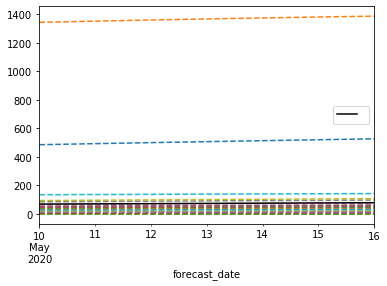

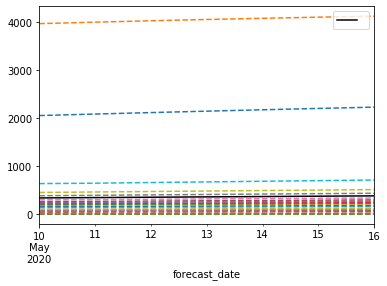

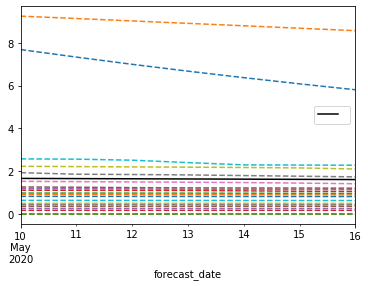

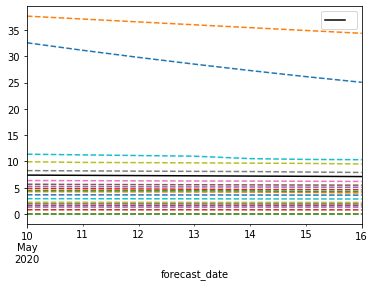

In [22]:

for target_type in output.target_type.unique():
    fig, ax=plt.subplots()
    for quantile in output['quantile'].unique():
        try:
            output[(output.target_type == target_type) 
                 & (output['quantile'] == quantile)
                 & (output['type'] == 'quantile')].plot(x='forecast_date', y='value', 
                                                        label='', 
                                                        ax=ax, linestyle='--')
        except:
            next
            
    output[(output.target_type == target_type) 
         & (output['type'] == 'point')].plot(x='forecast_date', y='value', 
                                             label='', ax=ax, color='k')
            

In [6]:
output.type.unique()

array(['quantile'], dtype=object)

In [43]:
forecast_ensemble = om.generate_forecast_ensemble( model_ensemble)

In [48]:
np.tile([1,2,3], 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [49]:
quantile_output = om.generate_quantile_output(forecast_ensemble)

In [51]:
output.sort_values(['target', 'quantile'])

,target,value,quantile,location,target_end_date,type
0,2 day ahead cum death,0,0.010,06075,2020-05-16,quantile
1,2 day ahead cum death,0,0.025,06075,2020-05-16,quantile
2,2 day ahead cum death,3.93745,0.050,06075,2020-05-16,quantile
3,2 day ahead cum death,8.95873,0.100,06075,2020-05-16,quantile
4,2 day ahead cum death,12.3163,0.150,06075,2020-05-16,quantile
...,...,...,...,...,...,...
149,8 day ahead inc hosp,8.64305,0.800,06075,2020-05-16,quantile
150,8 day ahead inc hosp,10.5081,0.850,06075,2020-05-16,quantile
151,8 day ahead inc hosp,13.1076,0.900,06075,2020-05-16,quantile
152,8 day ahead inc hosp,24.2248,0.975,06075,2020-05-16,quantile


In [32]:
er = EnsembleRunner(fips='06075')

Did not match 66 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
